In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("qsar_aquatic_toxicity.csv",sep = ';')

X = data.iloc[:, 0:8]
Y = data.iloc[:,8:9]

x_train, x_test, y_train, y_test = train_test_split(X,Y,  test_size=0.10,
                                                    random_state=42)
normal = StandardScaler()
y_train = normal.fit_transform(y_train)
y_test = normal.transform(y_test)

X_train = torch.FloatTensor(np.array(x_train))
X_test = torch.FloatTensor(np.array(x_test))
Y_train = torch.FloatTensor(np.array(y_train))
Y_test = torch.FloatTensor(np.array(y_test))

In [3]:
num_epoch = 40000
learning_rate = 7e-5
weight_decay_p = 0.15

model = nn.Linear(8,1)

optimizer = optim.SGD(model.parameters(), lr=learning_rate, 
                      weight_decay=weight_decay_p)
criterion = nn.MSELoss()

In [4]:
def train_dataset(model, X_train, Y_train, epochs):
    for i in range(1, epochs + 1):

        prediction = model(X_train)

        cost = F.mse_loss(prediction, Y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if i % (epochs/20) == 0:
            print('Epoch {:4d}/{} Cost: {:.6f}'.format(i, epochs, cost.item()))

In [5]:
def display_results(model, X_test, Y_test):
    import matplotlib.pyplot as plt
    prediction = model(X_test)
    loss = criterion(input=prediction, target=Y_test)
    
    m,n = np.shape(Y_test)
    x_axies = np.arange(m)
    Y_test_np = Y_test.numpy()
    X_test_np = X_test.numpy()
    prediction_np = prediction.detach().numpy()

    
    plt.clf()
    plt.scatter(x_axies, prediction_np, label = "original data", color = "red")
    plt.scatter(x_axies, Y_test_np, label = "predicted data", color ="blue")
    plt.legend()
    plt.xlabel("# of data")
    plt.ylabel("Values of LC50")
    plt.title('loss={:.4}'.format(loss.data.item()))
    plt.ylim(-10,10)
    plt.show()

Epoch 2000/40000 Cost: 0.998950
Epoch 4000/40000 Cost: 0.812438
Epoch 6000/40000 Cost: 0.709881
Epoch 8000/40000 Cost: 0.648678
Epoch 10000/40000 Cost: 0.610141
Epoch 12000/40000 Cost: 0.584715
Epoch 14000/40000 Cost: 0.567281
Epoch 16000/40000 Cost: 0.554948
Epoch 18000/40000 Cost: 0.546004
Epoch 20000/40000 Cost: 0.539381
Epoch 22000/40000 Cost: 0.534389
Epoch 24000/40000 Cost: 0.530565
Epoch 26000/40000 Cost: 0.527591
Epoch 28000/40000 Cost: 0.525244
Epoch 30000/40000 Cost: 0.523367
Epoch 32000/40000 Cost: 0.521845
Epoch 34000/40000 Cost: 0.520596
Epoch 36000/40000 Cost: 0.519558
Epoch 38000/40000 Cost: 0.518685
Epoch 40000/40000 Cost: 0.517943


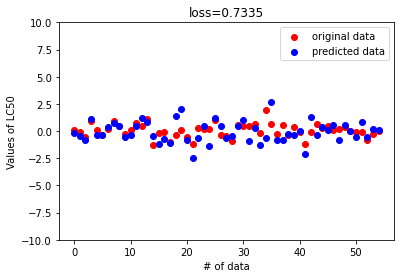

In [6]:
train_dataset(model, X_train, Y_train, epochs=num_epoch)
display_results(model, X_test,Y_test)